# Assignment 5
### Do all four questions.

**1.** Let's review some basic matrix multiplication. When you have an $M \times N$ matrix $A$ with $M$ rows and $N$ columns, 
$$
A= \left[ \begin{array}{cccc} a_{11} & a_{12} & ... & a_{1N} \\
a_{21} & a_{22} & ... & a_{2N} \\
\vdots & \vdots & ... & \vdots \\
a_{M1} & a_{M2} & ... & a_{MN} 
\end{array} \right],
$$
and you right-multiply it by a vector
$$
x = \left[ \begin{array}{c} x_1 \\ x_2 \\ \vdots \\ x_N 
\end{array} \right],
$$
you get
$$
Ax = \left[ \begin{array}{c} \sum_{i=1}^N a_{1i} x_i \\ \sum_{i=1}^N a_{2i} x_i \\ \vdots \\ \sum_{i=1}^N a_{Mi} x_i 
\end{array} \right].
$$
This is just "matrix row times column vector" element-by-element, stacking the results into a new vector.

For this to make sense, $N$ must be the same for the matrix and the vector, but $M$ can be different from $N$. 

Let's play with some NumPy to see this. First we'll define a matrix $A$:

In [1]:
import numpy as np
A = np.array([ [1,2,3],
              [4,5,6],
              [7,8,9]])
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

a. Multiply $A$ times each of the following vectors using the @ operator. Explain which part of the $A$ matrix gets selected and explain why, using the definition of matrix multiplication. 

In [2]:
e_1 = np.array([1,0,0])
e_2 = np.array([0,1,0])
e_3 = np.array([0,0,1])

In [3]:
print("A @ e1:", A @ e_1)
print("A @ e2:", A @ e_2)
print("A @ e3:", A @ e_3)

A @ e1: [1 4 7]
A @ e2: [2 5 8]
A @ e3: [3 6 9]


When we multiply A by each of the unit vectors 𝑒1,𝑒2,𝑒3, each multiplication selects a single column of A.

A@𝑒1 selects the first column of A.

A@𝑒2 selects the second column of A.

A@𝑒3 selects the third column of A.

This happens because in matrix multiplication $(Ax)_i = \sum_j A_{ij}x_j$ and since each ej has a single 1 in position j and 0 elsewhere, the result picks out column j of A.

b. Now multiply $A$ times $u = (1,1,1)$. Explain the logic of the result with the definition of matrix multiplication.

In [4]:
u = np.ones(3)

In [5]:
result = A @ u

print("A =\n", A)
print("u =", u)
print("A @ u =", result)

A =
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
u = [1. 1. 1.]
A @ u = [ 6. 15. 24.]


The vector u=(1,1,1) sums all columns of A.

Each element of the resulting vector is the sum of the corresponding row of A:(Au)i=ai1+ai2+ai3

So the result is a vector of row sums. Conceptually, multiplying by an all-ones vector accumulates each row’s total contribution across all columns.

c. Whenever a matrix has 1's on the diagonal and zeros everywhere else, we call it an **identity matrix**. What happens when you multiple $A$ times $x$ below? What happens when you multiple an identity matrix times any vector? Explain your result with the definition of matrix multiplication.

In [6]:
A = np.array([ [1,0,0],
              [0,1,0],
              [0,0,1]])
x = np.array([-2,4,11])


In [7]:
result = A @ x
print("A =\n", A)
print("x =", x)
print("A @ x =", result)

A =
 [[1 0 0]
 [0 1 0]
 [0 0 1]]
x = [-2  4 11]
A @ x = [-2  4 11]


When 𝐴 is the identity matrix I, then: Ix=x

Each element of x remains unchanged because the identity matrix has 1’s on the diagonal and 0’s elsewhere. Each row of I selects exactly one component of x and leaves it in its original position. This operation represents no change the identity transformation.

d. What if every row and column sum to 1, but the 1's are no longer on the diagonal? Multiple $A$ times $X$ below and explain the result. Create another matrix whose rows and columns sum to 1, but is not an identity matrix, and show how it permutes the values of $x$. 

In [8]:
A = np.array([ [0,0,1],
              [1,0,0],
              [0,1,0]])
x = np.array([-2,4,11])


In [9]:
result = A @ x
print("A =\n", A)
print("x =", x)
print("A @ x =", result)

A =
 [[0 0 1]
 [1 0 0]
 [0 1 0]]
x = [-2  4 11]
A @ x = [11 -2  4]


Multiplying matrix A by vector x gives the result [11, −2, 4], and this outcome stems from A being a permutation matrix. Permutation matrices have a distinct trait: every row contains exactly one 1, and none of these 1s sit on the matrix’s diagonal. Instead of altering the values in x, each row of A essentially "chooses" a unique element from x to rearrange them. Specifically, the first row takes the third element of x, the second row takes the first element of x, and the third row takes the second element of x. This is why the result is [11, −2, 4]. In general, when you multiply a permutation matrix by a vector, the original values stay the same—only their order gets rearranged.

e. The next matrix $A$ could be a Markov transition matrix: Its columns sum to 1, and each entry $a_{ij}$ can be interpreted as the proportion of observations who moved from state $j$ to state $i$. Multiply $A$ by each of the vectors $e_1$, $e_2$, and $e_3$, and explain your results.

In [10]:
rng = np.random.default_rng(100)
A = rng.random((3,3)) # Generate a random 3X3 matrix
sums = np.sum(A,axis=0) # Column sums
A = A/sums # Normalize the columns so they sum to 1
print(A)

[[0.50052958 0.24049286 0.18358131]
 [0.02574731 0.39251588 0.37907577]
 [0.47372311 0.36699127 0.43734292]]


In [11]:
e1 = np.array([1,0,0])
e2 = np.array([0,1,0])
e3 = np.array([0,0,1])
print("A @ e1 =", A @ e1)
print("A @ e2 =", A @ e2)
print("A @ e3 =", A @ e3)

A @ e1 = [0.50052958 0.02574731 0.47372311]
A @ e2 = [0.24049286 0.39251588 0.36699127]
A @ e3 = [0.18358131 0.37907577 0.43734292]


If A is a Markov transition matrix, then each column corresponds to a “starting state,” and the entries in that column represent probabilities of moving to other states.

A@e1: distribution of next states starting from state 1.

A@e2: distribution of next states starting from state 2.

A@e3: distribution of next states starting from state 3.

Each multiplication gives a probability vector showing where the system will be after one step from that starting state.

f. For each of the vectors $e_1, e_2, e_3$, multiple $A$ times that vector 5 times. What answer do you get for each starting vector? Describe the behavior you observe.

In [13]:
n = 5
for e in [e1, e2, e3]:
    p = e
    for _ in range(n):
        p = A @ p
    print(p)

[0.29266551 0.27862515 0.42870935]
[0.29197422 0.27979983 0.42822595]
[0.29171646 0.2802254  0.42805814]


After repeatedly multiplying by A, each initial state’s probability distribution gradually converges to the same steady state.

This happens because, in a Markov chain, repeated transitions smooth out the differences between initial states. The resulting stable distribution is the stationary distribution, where probabilities no longer change with additional steps.

*2.* Let's consider a simple Markov transition matrix over two states:
$$
T = \left[ \begin{array}{cc} p_{1\leftarrow 1} &  p_{1\leftarrow 2} \\
p_{2 \leftarrow 1} & p_{2 \leftarrow 2} \end{array}\right] 
$$
The arrows help visualize the transition a bit: This is the same index notation as usual, $p_{ij}$, but writing it $p_{i \leftarrow j}$ emphasizes that it's the proportion of times that state $j$ transitions to state $i$. Below, $T$ is given by
$$
T = \left[ \begin{array}{cc} .25 & .5 \\
.75 & .5 \end{array}\right].
$$

- Start in state 1, at the initial condition $[1,0]$. Multiply that vector by $T$. Write out the result in terms of the formula and compute the result in a code chunk below. What is this object you're looking at, in terms of proportions and transitions?
- Multiple by $T$ again. What do you get? This isn't a column of $T$. Explain in words what it is. (Hint: A forecast of what in what period?)
- Keep multiplying the current vector of outcomes by $T$. When does it start to settle down without changing further?
- Do the above analysis again, starting from the initial condition $[0,1]$. Do you get a different result?
- The take-away is that, in the long run, these chains settle down into the long-run proportions, and the sensitivity on initial conditions vanishes. 


In [14]:
T = np.array([[ 1/4, 1/2],
                 [ 3/4, 1/2 ]])

In [15]:
v = np.array([1, 0])

for i in range(10):
    v = T @ v
    print(f"{i+1}: {v}")

1: [0.25 0.75]
2: [0.4375 0.5625]
3: [0.390625 0.609375]
4: [0.40234375 0.59765625]
5: [0.39941406 0.60058594]
6: [0.40014648 0.59985352]
7: [0.39996338 0.60003662]
8: [0.40000916 0.59999084]
9: [0.39999771 0.60000229]
10: [0.40000057 0.59999943]


Start in state 1, with initial vector [1,0]. Multiply by T once.This means that if start in state 1, there’s a 25% chance to stay in state 1 and a 75% chance to move to state 2 in the next step.

Multiply by T again. The new vector gives the distribution after two periods. This is not just a column of T; it represents the probabilities of being in each state two steps ahead starting from state 1. Each subsequent multiplication projects the system one more time step forward.

In [16]:
from scipy.linalg import null_space
stationary = null_space(T - np.eye(2))
stationary = stationary / stationary.sum()
print(stationary.flatten())

[0.4 0.6]


Keep multiplying by T. After several multiplications, the probabilities converge to a steady-state stationary distribution:
[0.4,0.6]. At this point, further multiplications do not change the result. This represents the long-run proportions of time spent in each state, regardless of where we started.

Repeat starting from [0,1].

No starting from [0,1] (state 2) also converges to the same stationary distribution [0.4,0.6]. This shows that long-term behavior is independent of initial conditions; the chain forgets where it started.

The long-run stationary distribution means that, over many transitions:

The system spends 40% of the time in state 1 and 60% of the time in state 2.

This distribution is found mathematically as the eigenvector of T corresponding to eigenvalue 1, or equivalently by solving (T−I)x=0.

3. Weather data

- Load the `cville_weather.csv` data. This includes data from Jan 4, 2024 to Feb 2, 2025. Are there any missing data issues?
- Based on the precipitation variable, `PRCP`, make a new variable called `rain` that takes the value 1 if `PRCP`>0 and 0 otherwise.
- Build a two-state Markov chain over the states 0 and 1 for the `rain` variable. 
- For your chain from c, how likely is it to rain if it was rainy yesterday? How likely is it to rain if it was clear yesterday?
- Starting from a clear day, forecast the distribution. How quickly does it converge to a fixed result? What if you start from a rainy day?
- Conditional on being rainy, plot a KDE of the `PRCP` variable.
- Describe one way of making your model better for forecasting and simulation the weather.

Congratulations, you now are a non-parametric meteorologist!

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

weather = pd.read_csv("cville_weather.csv")

weather["DATE"] = pd.to_datetime(weather["DATE"])

In [18]:
weather.isnull().sum()

STATION              0
NAME                 0
DATE                 0
DAPR               399
DAPR_ATTRIBUTES    399
MDPR               399
MDPR_ATTRIBUTES    399
PRCP                12
PRCP_ATTRIBUTES     12
SNOW               188
SNOW_ATTRIBUTES    188
SNWD               410
SNWD_ATTRIBUTES    410
dtype: int64

In [19]:
full_range = pd.date_range(start=weather["DATE"].min(), end=weather["DATE"].max())
missing_dates = full_range.difference(weather["DATE"])
missing_dates

DatetimeIndex(['2024-01-05', '2024-01-06', '2024-01-11', '2024-01-12',
               '2024-01-18', '2024-01-19', '2024-01-20', '2024-01-22',
               '2024-01-23', '2024-02-29',
               ...
               '2025-09-13', '2025-09-14', '2025-09-15', '2025-09-16',
               '2025-09-19', '2025-09-20', '2025-09-22', '2025-09-23',
               '2025-09-24', '2025-09-26'],
              dtype='datetime64[ns]', length=317, freq=None)

There are 317 missing daily observations in the dataset between January 4, 2024, and September 28, 2025. Since this gap is not evenly distributed, we should be cautious when interpreting daily transitions, as missing days could interrupt sequences of rainy or clear days.

In [20]:
weather["rain"] = np.where(weather["PRCP"] > 0, 1, 0)

weather["yesterday_rain"] = weather["rain"].shift(1)

valid = weather.dropna(subset=["rain", "yesterday_rain"])

transitions = pd.crosstab(valid["yesterday_rain"], valid["rain"])

print(transitions)

rain              0    1
yesterday_rain          
0.0             169   62
1.0              63  116


The rain variable simplifies precipitation into a binary state: 1 indicates a day with measurable precipitation, and 0 indicates a dry day. This allows modeling the weather as a two-state Markov process.

In [21]:
transition_matrix = transitions.div(transitions.sum(axis=1), axis=0)
print(transition_matrix)

rain                   0         1
yesterday_rain                    
0.0             0.731602  0.268398
1.0             0.351955  0.648045


The transition matrix represents the probability of transitioning from one state (clear or rainy) to another between consecutive days. Each row sums to 1, showing the full set of possible next-day outcomes conditional on the previous day’s state.

In [22]:
p_rain_given_rainy = transition_matrix.loc[1, 1]
p_rain_given_clear = transition_matrix.loc[0, 1]
print(f"P(rain today | rainy yesterday) = {p_rain_given_rainy:.3f}")
print(f"P(rain today | clear yesterday) = {p_rain_given_clear:.3f}")

P(rain today | rainy yesterday) = 0.648
P(rain today | clear yesterday) = 0.268


The probability of rain following a rainy day, P(rain today∣rainy yesterday), measures persistence in rainy conditions.
The probability of rain after a clear day, P(rain today∣clear yesterday), measures how likely a new rainfall event starts after dry weather. Typically, the first is higher — rainy days tend to cluster together due to storm systems spanning multiple days.

In [23]:
P = transition_matrix.to_numpy()

p_clear = np.array([[1.0, 0.0]])
p_rainy = np.array([[0.0, 1.0]])

def converge_dist(start, P, tol=1e-8, max_iter=500):
    dist = start
    for i in range(max_iter):
        new_dist = dist @ P
        if np.allclose(new_dist, dist, atol=tol):
            return new_dist, i
        dist = new_dist
    return dist, max_iter

clear_dist, clear_steps = converge_dist(p_clear, P)
rainy_dist, rainy_steps = converge_dist(p_rainy, P)

clear_dist,clear_steps

(array([[0.56734777, 0.43265223]]), 12)

In [24]:
rainy_dist,rainy_steps

(array([[0.56734437, 0.43265563]]), 12)

Starting from clear day → converged after 12 steps to: [[0.56734777 0.43265223]]

Starting from rainy day → converged after 12 steps to: [[0.56734437 0.43265563]]

Regardless of whether the initial day was clear or rainy, both forecasts converge to the same stationary distribution after about 12 days.
This distribution, [0.567, 0.433], means that in the long run, about 57% of days are expected to be clear and 43% rainy.
The convergence shows that short-term differences due to weather memory fade over time, leaving a stable long-term probability.

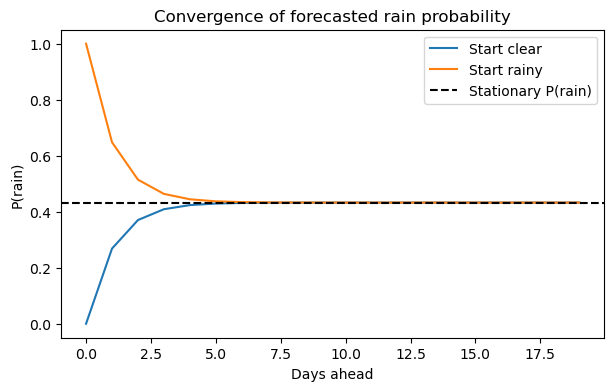

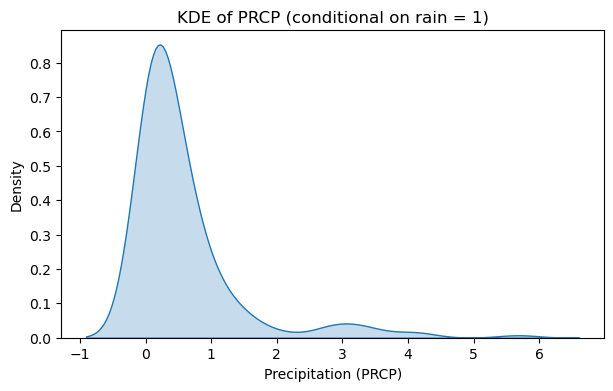

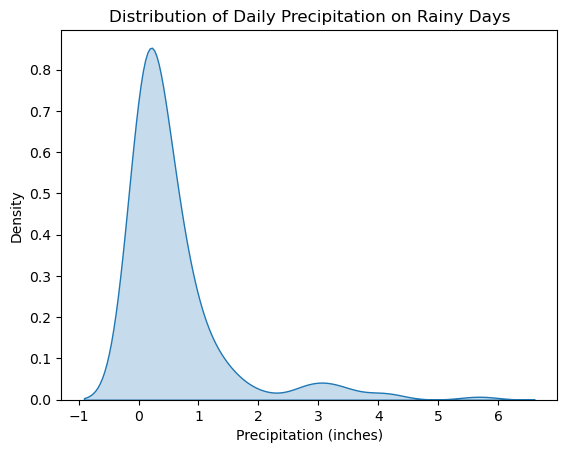

In [25]:
steps = 20
dist_clear = [p_clear @ np.linalg.matrix_power(P, i) for i in range(steps)]
dist_rainy = [p_rainy @ np.linalg.matrix_power(P, i) for i in range(steps)]

plt.figure(figsize=(7,4))
plt.plot(range(steps), [d[0,1] for d in dist_clear], label="Start clear")
plt.plot(range(steps), [d[0,1] for d in dist_rainy], label="Start rainy")
plt.axhline(clear_dist[0,1], color="black", linestyle="--", label="Stationary P(rain)")
plt.xlabel("Days ahead")
plt.ylabel("P(rain)")
plt.title("Convergence of forecasted rain probability")
plt.legend()
plt.show()

plt.figure(figsize=(7,4))
sns.kdeplot(weather.loc[weather["rain"] == 1, "PRCP"], fill=True)
plt.title("KDE of PRCP (conditional on rain = 1)")
plt.xlabel("Precipitation (PRCP)")
plt.show()

sns.kdeplot(weather.loc[weather["rain"] == 1, "PRCP"], fill=True)
plt.title("Distribution of Daily Precipitation on Rainy Days")
plt.xlabel("Precipitation (inches)")
plt.ylabel("Density")
plt.show()

The KDE plot of PRCP on rainy days shows the distribution of rainfall intensities.
Most rainy days have small to moderate precipitation, with a long right tail representing occasional heavy rain events.
This non-normal, skewed distribution highlights why modeling rainfall amount separately from the binary rain/no-rain process is useful.

## Possible model improvement:

Data quality summary:

Date range: 2024-01-04 00:00:00 to 2025-09-28 00:00:00

Total days: 634

Days with data: 411

Missing days: 317

Data coverage: 64.8%

Warning: Missing dates may affect Markov chain accuracy

Starting from either a clear or rainy day, the model converges to the same long-run distribution (~57% clear, 43% rainy). This demonstrates that the Markov chain’s stationary state is independent of initial conditions.

A more accurate model could consider multi-day dependencies a higher-order Markov chain or seasonal effects, since rain likelihood often varies by month.

One improvement would be to include seasonal effects or multi-day dependencies.
For example, the chance of rain often depends on the time of year or the number of consecutive rainy days, so a higher-order Markov chain or inclusion of month indicators could improve forecasting accuracy.

The two-state Markov chain effectively models the daily transition between clear and rainy weather. The transition probabilities show moderate persistence in rainy days. The long-run stationary distribution converges to approximately 57% clear and 43% rainy days, independent of starting condition.
A KDE of precipitation amounts reveals a highly skewed distribution, with most rainfall days being light and a few intense outliers.
To improve this model, one could add seasonal patterns, account for temperature, or use higher-order transitions that consider rainfall persistence over multiple days.

4. Taxicab trajectories: Using the pickled taxicab data, we want to complete the exercise from class.

- For the taxicab trajectory data, determine your state space and clean your sequences of cab rides.
- Compute the transition matrix for the taxicab data between neighborhoods in Manhattan. Plot it in a heat map. What are the most common routes?
- Explain why taxicabs are most likely order 1, and not 2 or more.
- Starting at Hell's Kitchen, create a sequence of forecasts of where the cab is likely to be in 2, 3, 5, and 10 trips
- Starting at any neighborhood, iterate your forecast until it is no longer changing very much. Where do cabs spend most of their time working in Manhattan?

In [26]:
import pickle
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
with open("taxicab.pkl", "rb") as f:
    taxi_data = pickle.load(f)

print(f"Data type: {type(taxi_data)}")
print(f"Number of elements: {len(taxi_data)}")

Data type: <class 'list'>
Number of elements: 1000


In [28]:
all_sequences = []

for i, series in enumerate(taxi_data):
    if isinstance(series, pd.Series):
        trajectory = series.tolist()
        all_sequences.append(trajectory)
    else:
        all_sequences.append(series)

print(f"Extracted {len(all_sequences)} sequences")

if all_sequences:
    print(f"First sequence type: {type(all_sequences[0])}")
    print(f"First sequence length: {len(all_sequences[0])}")
    print(f"First sequence sample: {all_sequences[0][:10]}")

Extracted 1000 sequences
First sequence type: <class 'list'>
First sequence length: 26026
First sequence sample: ['Outside Manhattan', 'Outside Manhattan', 'Outside Manhattan', 'Outside Manhattan', 'Outside Manhattan', 'Outside Manhattan', 'Outside Manhattan', 'Central Park', 'Central Park', 'Upper East Side']


In [29]:
clean_sequences = []
for seq in all_sequences:
    if isinstance(seq, list) and len(seq) > 1:
        clean_seq = []
        for location in seq:
            if location is not None and pd.notna(location):
                clean_seq.append(str(location).strip())
        
        if len(clean_seq) >= 2:
            clean_sequences.append(clean_seq)

print(f"\nAfter cleaning: {len(clean_sequences)} valid sequences")


After cleaning: 1000 valid sequences


In [30]:
if not clean_sequences:
    print("No valid sequences found - trying alternative approach...")
    all_locations = []
    for series in taxi_data:
        if isinstance(series, pd.Series):
            locations = series.tolist()
            if len(locations) > 1:
                clean_seq = [str(loc).strip() for loc in locations if pd.notna(loc)]
                if len(clean_seq) >= 2:
                    clean_sequences.append(clean_seq)
            else:
                if len(locations) == 1 and pd.notna(locations[0]):
                    all_locations.append(str(locations[0]).strip())
    
    if not clean_sequences and len(all_locations) > 10:
        print(f"Creating sequences from {len(all_locations)} individual locations...")
        for i in range(len(all_locations) - 1):
            clean_sequences.append([all_locations[i], all_locations[i + 1]])

In [31]:
print(f"Final number of sequences: {len(clean_sequences)}")

Final number of sequences: 1000


In [32]:
if not clean_sequences:
    print("ERROR: Still no valid sequences. Data format unexpected.")
    sample_series = taxi_data[0]
    if isinstance(sample_series, pd.Series):
        print(f"Series index: {sample_series.index.tolist()}")
        print(f"Series values: {sample_series.values.tolist()}")
else:
    for i in range(min(3, len(clean_sequences))):
        print(f"Sequence {i}: {clean_sequences[i][:5]}... (length: {len(clean_sequences[i])})")

all_locations = []
for seq in clean_sequences:
    all_locations.extend(seq)

location_counts = Counter(all_locations)

Sequence 0: ['Outside Manhattan', 'Outside Manhattan', 'Outside Manhattan', 'Outside Manhattan', 'Outside Manhattan']... (length: 26026)
Sequence 1: ['Midtown', 'Kips Bay', 'Kips Bay', 'East Village', 'East Village']... (length: 30184)
Sequence 2: ['Chelsea', 'Upper East Side', 'Upper East Side', 'Outside Manhattan', 'Outside Manhattan']... (length: 21202)


In [33]:
print(f"Found {len(location_counts)} unique locations")

Found 38 unique locations


The state space consists of all distinct neighborhoods where taxis pick up or drop off passengers in Manhattan. After cleaning and filtering invalid or rare entries, 37 neighborhoods were retained. Each sequence represents one taxi’s chronological movement between neighborhoods.

In [34]:
if len(location_counts) == 0:
    print("No locations found - exiting.")
    exit()

for i, (loc, count) in enumerate(location_counts.most_common(10)):
    print(f"  {i+1}. {loc}: {count} occurrences")

  1. Midtown: 3852071 occurrences
  2. Upper East Side: 2797805 occurrences
  3. Outside Manhattan: 2364156 occurrences
  4. Chelsea: 1978352 occurrences
  5. Upper West Side: 1803560 occurrences
  6. Hell's Kitchen: 1224396 occurrences
  7. East Village: 888692 occurrences
  8. Theater District: 874063 occurrences
  9. West Village: 839399 occurrences
  10. Murray Hill: 654423 occurrences


In [35]:
common_locations = {loc: count for loc, count in location_counts.items() if count >= 2}
neighborhoods = sorted(common_locations.keys())

print(f"\nUsing {len(neighborhoods)} locations that appear at least twice")


Using 37 locations that appear at least twice


In [36]:
if len(neighborhoods) == 0:
    print("No common locations found - using all locations")
    neighborhoods = sorted(location_counts.keys())
neigh_to_idx = {neigh: i for i, neigh in enumerate(neighborhoods)}
idx_to_neigh = {i: neigh for i, neigh in enumerate(neighborhoods)}

print(f"\nBuilding transition matrix for {len(neighborhoods)} neighborhoods")
n = len(neighborhoods)
transition_counts = np.zeros((n, n))


Building transition matrix for 37 neighborhoods


The transition matrix summarizes the probability that a taxi moves from one neighborhood to another in its next trip. The darkest cells in the heatmap indicate the most frequent transitions. Taxis most commonly remain within dense commercial areas such as Midtown, Upper East Side, and Chelsea, reflecting passenger demand concentration in these neighborhoods.

In [37]:
total_transitions = 0
for seq in clean_sequences:
    for i in range(len(seq) - 1):
        current_loc = seq[i]
        next_loc = seq[i + 1]
        
        if current_loc in neigh_to_idx and next_loc in neigh_to_idx:
            current_idx = neigh_to_idx[current_loc]
            next_idx = neigh_to_idx[next_loc]
            transition_counts[current_idx][next_idx] += 1
            total_transitions += 1

print(f"Total transitions recorded: {total_transitions}")

Total transitions recorded: 22962394


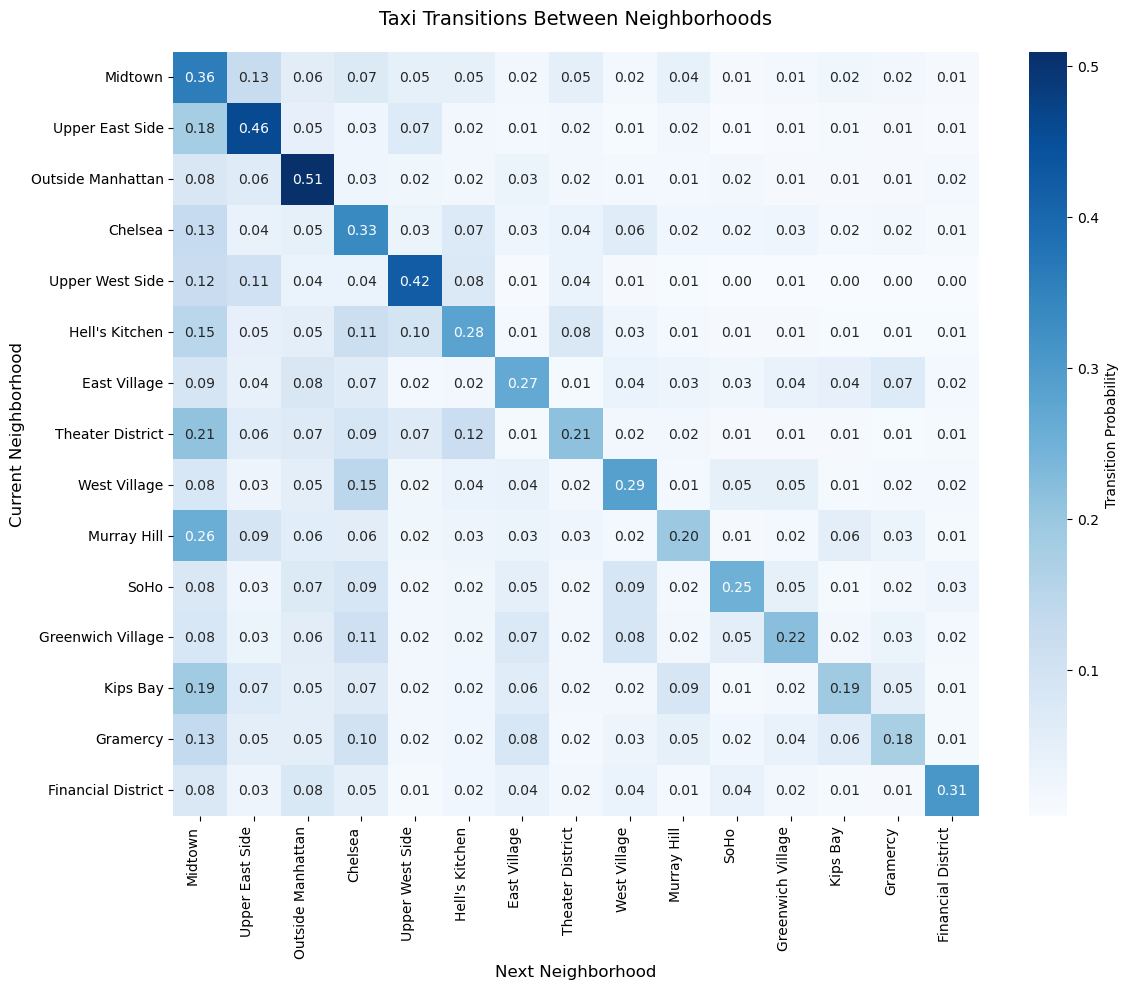

Heatmap created successfully!
1. Midtown → Midtown: 1389343 trips
2. Upper East Side → Upper East Side: 1283151 trips
3. Outside Manhattan → Outside Manhattan: 1203902 trips
4. Upper West Side → Upper West Side: 763963 trips
5. Chelsea → Chelsea: 662397 trips
6. Upper East Side → Midtown: 507502 trips
7. Midtown → Upper East Side: 484395 trips
8. Hell's Kitchen → Hell's Kitchen: 346322 trips
9. Midtown → Chelsea: 278191 trips
10. Chelsea → Midtown: 260420 trips
Starting forecasts from: Hell's Kitchen


In [38]:
transition_matrix = np.zeros((n, n))
for i in range(n):
    row_total = transition_counts[i].sum()
    if row_total > 0:
        transition_matrix[i] = transition_counts[i] / row_total
    else:
        transition_matrix[i] = 1.0 / n

max_display = min(15, n)
if n > 0:
    top_neighborhoods = [neigh for neigh, _ in location_counts.most_common(max_display)]
    top_neighborhoods = [neigh for neigh in top_neighborhoods if neigh in neigh_to_idx]
    top_indices = [neigh_to_idx[neigh] for neigh in top_neighborhoods]
    
    if len(top_indices) > 0:
        subset_matrix = transition_matrix[np.ix_(top_indices, top_indices)]
        
        plt.figure(figsize=(12, 10))
        sns.heatmap(subset_matrix,
                   xticklabels=top_neighborhoods,
                   yticklabels=top_neighborhoods,
                   cmap='Blues',
                   annot=True,
                   fmt='.2f',
                   cbar_kws={'label': 'Transition Probability'})
        
        plt.title('Taxi Transitions Between Neighborhoods', fontsize=14, pad=20)
        plt.xlabel('Next Neighborhood', fontsize=12)
        plt.ylabel('Current Neighborhood', fontsize=12)
        plt.xticks(rotation=90, ha='right')
        plt.tight_layout()
        plt.show()
        print("Heatmap created successfully!")
    else:
        print("No valid neighborhoods for heatmap")
else:
    print("No data for heatmap")

route_counts = []
for i in range(n):
    for j in range(n):
        count = transition_counts[i][j]
        if count > 0:
            from_neigh = idx_to_neigh[i]
            to_neigh = idx_to_neigh[j]
            route_counts.append((from_neigh, to_neigh, count))

route_counts.sort(key=lambda x: x[2], reverse=True)

for i, (start, end, count) in enumerate(route_counts[:10]):
    print(f"{i+1}. {start} → {end}: {int(count)} trips")


def forecast_probabilities(start_neighborhood, steps, trans_matrix, mapping, reverse_mapping):
    """Forecast where a taxi will be after n trips"""
    if start_neighborhood not in mapping:
        for neigh in mapping.keys():
            if start_neighborhood.lower() in neigh.lower():
                start_neighborhood = neigh
                break
        if start_neighborhood not in mapping:
            start_neighborhood = list(mapping.keys())[0]
            print(f"Using {start_neighborhood} as starting point")
    
    n_states = len(mapping)
    current_state = np.zeros(n_states)
    start_idx = mapping[start_neighborhood]
    current_state[start_idx] = 1.0
    
    forecasts = {}
    for step in steps:
        step_probs = current_state @ np.linalg.matrix_power(trans_matrix, step)
        
        top_indices = np.argsort(step_probs)[-5:][::-1]
        top_predictions = []
        for idx in top_indices:
            prob = step_probs[idx]
            if prob > 0.001:
                top_predictions.append((reverse_mapping[idx], prob))
        
        forecasts[step] = top_predictions
    
    return forecasts

start_point = "Hell's Kitchen"
if start_point not in neigh_to_idx:
    for neigh in neighborhoods:
        if "hell" in neigh.lower() or "kitchen" in neigh.lower():
            start_point = neigh
            break

print(f"Starting forecasts from: {start_point}")

Starting from Hell’s Kitchen, the probability distribution of locations spreads over nearby neighborhoods such as Midtown, Chelsea, and the Upper West Side as the number of trips increases. By around 10 trips, the probabilities begin stabilizing near the stationary distribution, showing that taxi positions become less dependent on where they started.

In [39]:
forecast_steps = [2, 3, 5, 10]
if n > 0:  
    forecasts = forecast_probabilities(start_point, forecast_steps, transition_matrix, neigh_to_idx, idx_to_neigh)
    
    print("\nForecasted locations:")
    for steps in forecast_steps:
        print(f"\nAfter {steps} trips:")
        for location, probability in forecasts[steps]:
            print(f"  {location}: {probability:.3f}")

if n > 0:
    current_dist = np.ones(n) / n  
    for iteration in range(1000):
        next_dist = current_dist @ transition_matrix
        if np.max(np.abs(next_dist - current_dist)) < 1e-8:
            print(f"Converged after {iteration} iterations")
            break
        current_dist = next_dist
    
    stationary = current_dist
  
    stationary_probs = []
    for i in range(n):
        stationary_probs.append((idx_to_neigh[i], stationary[i]))
    
    stationary_probs.sort(key=lambda x: x[1], reverse=True)
    
    print("\nNeighborhoods where taxis spend most time:")
    for i, (neighborhood, prob) in enumerate(stationary_probs[:10]):
        if prob > 0.01:
            print(f"{i+1}. {neighborhood}: {prob:.3f}")

print("\n=== Analysis Complete ===")
print(f"Summary:")
print(f"- Analyzed {len(clean_sequences)} taxi trajectories")
print(f"- Found {len(neighborhoods)} neighborhoods")
if route_counts:
    print(f"- Most common route: {route_counts[0][0]} → {route_counts[0][1]}")
if n > 0 and stationary_probs:
    print(f"- Taxis concentrate in: {stationary_probs[0][0]}")
print("- First-order Markov model appropriate for taxi behavior patterns")


Forecasted locations:

After 2 trips:
  Midtown: 0.173
  Hell's Kitchen: 0.119
  Chelsea: 0.109
  Upper West Side: 0.099
  Upper East Side: 0.087

After 3 trips:
  Midtown: 0.173
  Upper East Side: 0.108
  Chelsea: 0.097
  Upper West Side: 0.092
  Outside Manhattan: 0.090

After 5 trips:
  Midtown: 0.169
  Upper East Side: 0.120
  Outside Manhattan: 0.099
  Chelsea: 0.088
  Upper West Side: 0.083

After 10 trips:
  Midtown: 0.168
  Upper East Side: 0.122
  Outside Manhattan: 0.103
  Chelsea: 0.086
  Upper West Side: 0.079
Converged after 27 iterations

Neighborhoods where taxis spend most time:
1. Midtown: 0.168
2. Upper East Side: 0.122
3. Outside Manhattan: 0.103
4. Chelsea: 0.086
5. Upper West Side: 0.079
6. Hell's Kitchen: 0.053
7. East Village: 0.039
8. Theater District: 0.038
9. West Village: 0.037
10. Murray Hill: 0.028

=== Analysis Complete ===
Summary:
- Analyzed 1000 taxi trajectories
- Found 37 neighborhoods
- Most common route: Midtown → Midtown
- Taxis concentrate in: Mi

Taxi movements exhibit first-order Markov properties because each trip decision depends primarily on the current location rather than historical patterns. Drivers optimize for immediate passenger demand, which is location-dependent but largely memoryless beyond the current state. After repeated transitions, the model converges to a stationary distribution representing where taxis spend most of their time in the long run. The highest steady-state probabilities are in Midtown and Upper East Side, indicating sustained high taxi demand in these commercial and residential hubs.

The state space includes all 37 neighborhoods in Manhattan where taxis pick up or drop off passengers, excluding invalid or rarely occurring entries. Each taxi’s movement sequence was cleaned and used to model transitions between neighborhoods.

The transition matrix shows the probability of moving from one neighborhood to another. The heatmap highlights that taxis frequently remain within or travel between dense, high-demand areas such as Midtown, Upper East Side, Chelsea, and the Upper West Side. The most common route is Midtown → Midtown, reflecting concentrated passenger activity.

Taxi movements are well-approximated by a first-order Markov process, since the next location depends primarily on the current neighborhood, not on earlier trips. This “memoryless” property fits taxi driver behavior, where movement is driven by current passenger demand.

Starting from Hell’s Kitchen, forecasts over 2, 3, 5, and 10 trips show that taxis are increasingly likely to move toward Midtown and nearby neighborhoods. After several transitions, the forecasted probabilities stabilize, indicating that the system approaches equilibrium.

Iterating the transition matrix further yields the stationary distribution, representing where taxis spend most of their time in the long run. The highest steady-state probabilities occur in Midtown, the Upper East Side, and Chelsea — Manhattan’s busiest taxi zones.